## Решим методом стрельбы задачу XI 9.2.б):
### Требуется получить численное решение нелинейных краевых задач
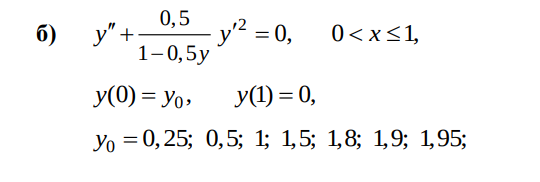

### Для каждого отдельного краевого условия на y'' в точке 0 можно получить методом Рунге-Кутты значение функции в точке 1. Подбирая подходящее условие, например, биномиальным поиском, мы и найдем численное решение. В этом заключается метод стрельбы.
### Сделаем замену z = y' и перейдем в к системе.

In [1]:
import math as m
import numpy as np
import time
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
def makeplot(x, y, xlabel = "x", ylabel = "y", title = 0, grid = 1, label = 0):
    clear_output(wait=True)
    if label != 0:
        plt.plot(x, y, label = label)
        plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    else:
        plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title != 0:
        plt.title(title)
    if grid:
        plt.grid()

In [2]:
def funODU (y, z):
    return z, 0.5 * (z ** 2)/(0.5 * y - 1.0)

h = 0.001

def RungeNext(x_n, y_n, f):
    f1 = f(x_n, y_n)
    #print("f1")
    #print(f1)
    #print(x_n + f1[0] * h / 2, y_n + f1[1] * h / 2)
    f2 = f(x_n + f1[0] * h / 2, y_n + f1[1] * h / 2)
    #print("f2\n", f2)
    f3 = f(x_n + f2[0] * h / 2, y_n + f2[1] * h / 2)
    #print("f_3")
    #print(f3)
    f4 = f(x_n + f3[0] * h, y_n + f3[1] * h)
    return x_n + h / 6 *((f1[0] + 2*f2[0] + 2*f3[0] + f4[0])), y_n + h / 6 *((f1[1] + 2*f2[1] + 2*f3[1] + f4[1]))

def ComputeY1(y0, z0, fun, title):
    y_prev = y0
    z_prev = z0
    y_lst = np.array([y_prev])
    z_lst = np.array([z_prev])
    t_lst = np.array([0.0])
    for i in range(int(1 / h)):
        t_lst = np.append(t_lst, [t_lst[-1] + h])
        y_prev, z_prev = RungeNext(y_prev, z_prev, fun)
        y_lst = np.append(y_lst, [y_prev])
        z_lst = np.append(z_lst, [z_prev])
    makeplot(t_lst, y_lst, title = title)
    plt.show()
    time.sleep(0.5)
    return y_prev, z_prev

In [3]:
def bin_search(fun, left, right, value = 0, abstol = 0.001):
    middle = (left + right) / 2
    computed = fun(middle)
    print("y'(0) = " + str(middle))
    if m.isclose(computed, value, abs_tol = abstol):
        return middle
    elif computed < value:
        return bin_search(fun, middle, right)
    else:
        return bin_search(fun, left, middle)

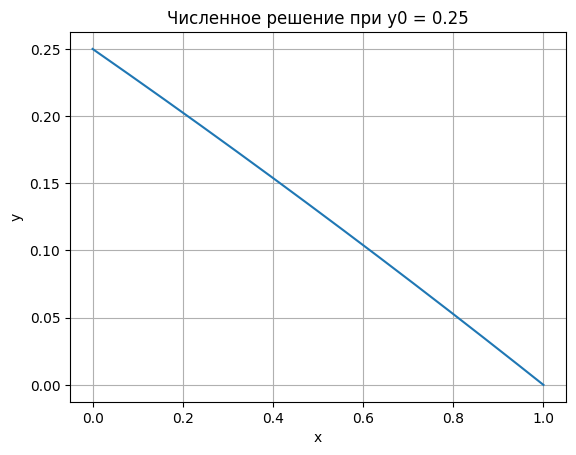

y'(0) = -0.2337646484375
-0.2337646484375


In [4]:
y0 = 0.25
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

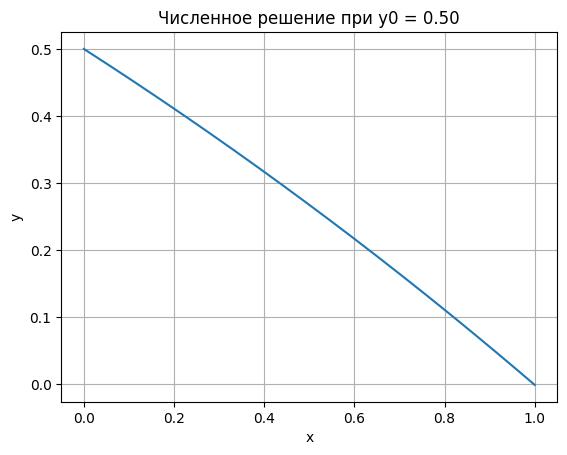

y'(0) = -0.43212890625
-0.43212890625


In [5]:
y0 = 0.5
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

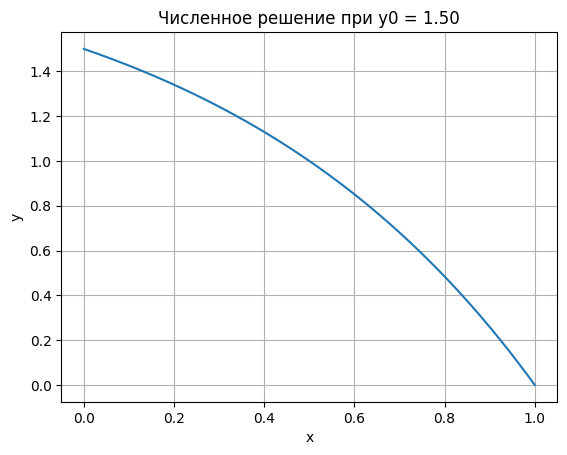

y'(0) = -0.69305419921875
-0.69305419921875


In [6]:
y0 = 1.5
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

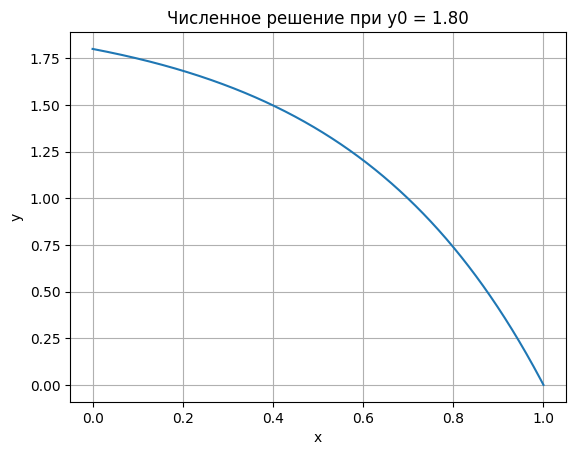

y'(0) = -0.46054840087890625
-0.46054840087890625


In [7]:
y0 = 1.8
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

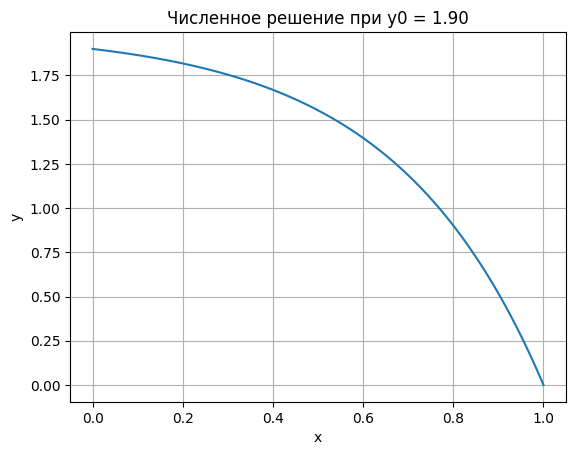

y'(0) = -0.29956817626953125
-0.29956817626953125


In [8]:
y0 = 1.9
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

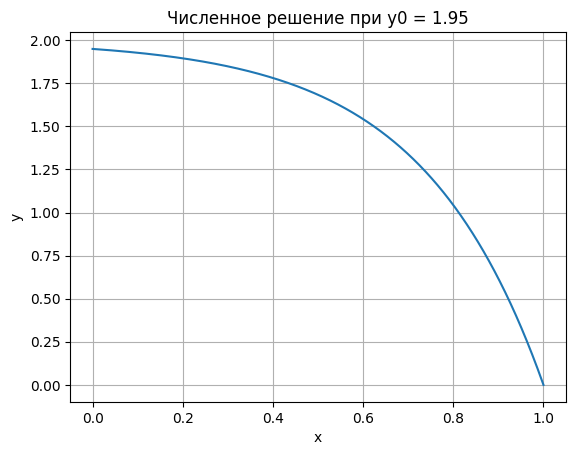

y'(0) = -0.18445968627929688
-0.18445968627929688


In [9]:
y0 = 1.95
y1 = 0

def FunParam(param) :
    return ComputeY1(y0, param, funODU, title = "Численное решение при y0 = %0.2f" % y0)[0]

print(bin_search(FunParam, -20.0, 5))

## Таким образом, мы решили нелинейное уравнение меотом стрельбы и увидели его решения при различных начальных условиях.